# Class Single Recording Code

Developing Code for Single Recordings
- Filtering
- Whole Trace Observations
- Epoch Extraction
- PSTHS

In [38]:
import tdt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from single_tdt_class import *

In [39]:
single_recording_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Cohort 1\Synapse\Tanks\5_7_24_Hab_DisHab_P2-240505-130502\good\nac\n1-240507-080133"
csv_base_path = r"C:\Users\alber\OneDrive\Documents\GitHub\PCLAB_Photometry\P2_Code\C1_Hab_Dishab\nac\n1-240507-080133.csv"

## Bout Data from CSV

In [40]:
tdt_data = tdt.read_block(single_recording_path)
# Assuming `tdt_data` is already loaded
tdt_data_obj = TDTData(tdt_data, single_recording_path)

tdt_data_obj.extract_manual_annotation_behaviors(csv_base_path)

# Remove specified time range
# tdt_data_obj.remove_time(start_time=780, end_time=921)

Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Cohort 1\Synapse\Tanks\5_7_24_Hab_DisHab_P2-240505-130502\good\nac\n1-240507-080133\Notes.txt
read from t=0s to t=1573.39s


## Plot Raw Trace

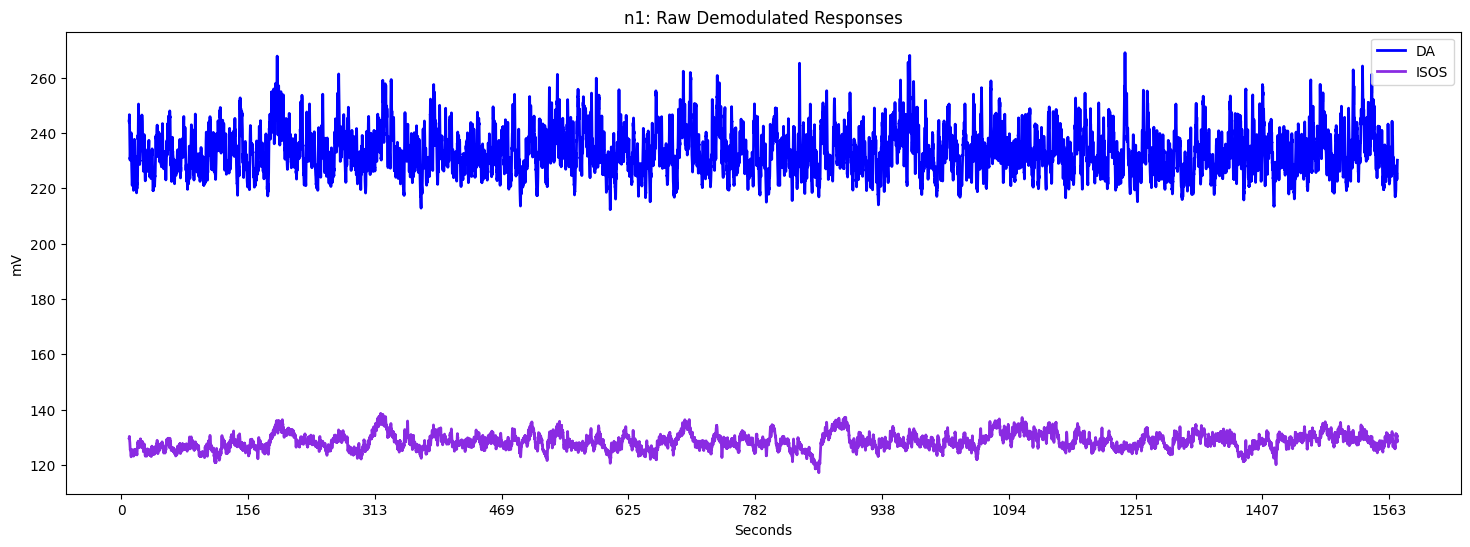

In [41]:
# Remove initial LED artifact
tdt_data_obj.remove_initial_LED_artifact(t=10)

tdt_data_obj.smooth_signal()
tdt_data_obj.verify_signal()
# Plot raw trace
tdt_data_obj.plot('raw')

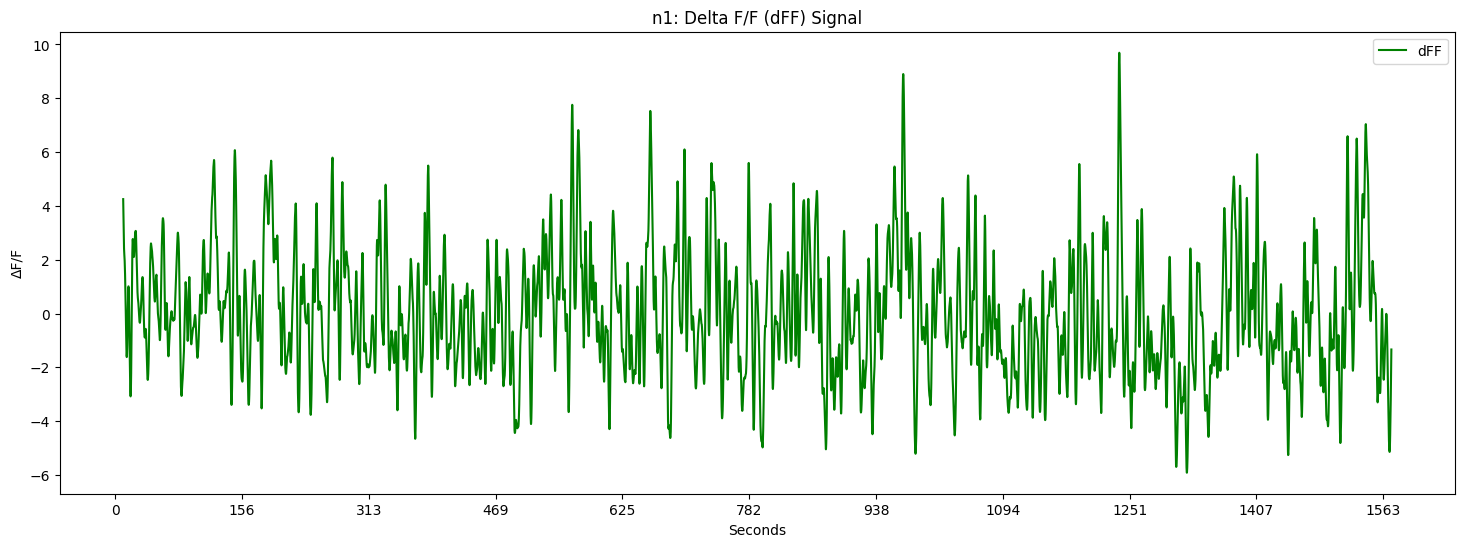

In [42]:
# Downsample the data
tdt_data_obj.downsample_data(N = 20)


# Compute dFF
tdt_data_obj.compute_dff()
tdt_data_obj.plot('dFF')

In [43]:
tdt_data_obj.compute_zscore()

In [44]:
tdt_data_obj.print_behaviors()

Behavior names in self.behaviors:
Cam1
Tick
Investigation
Approach


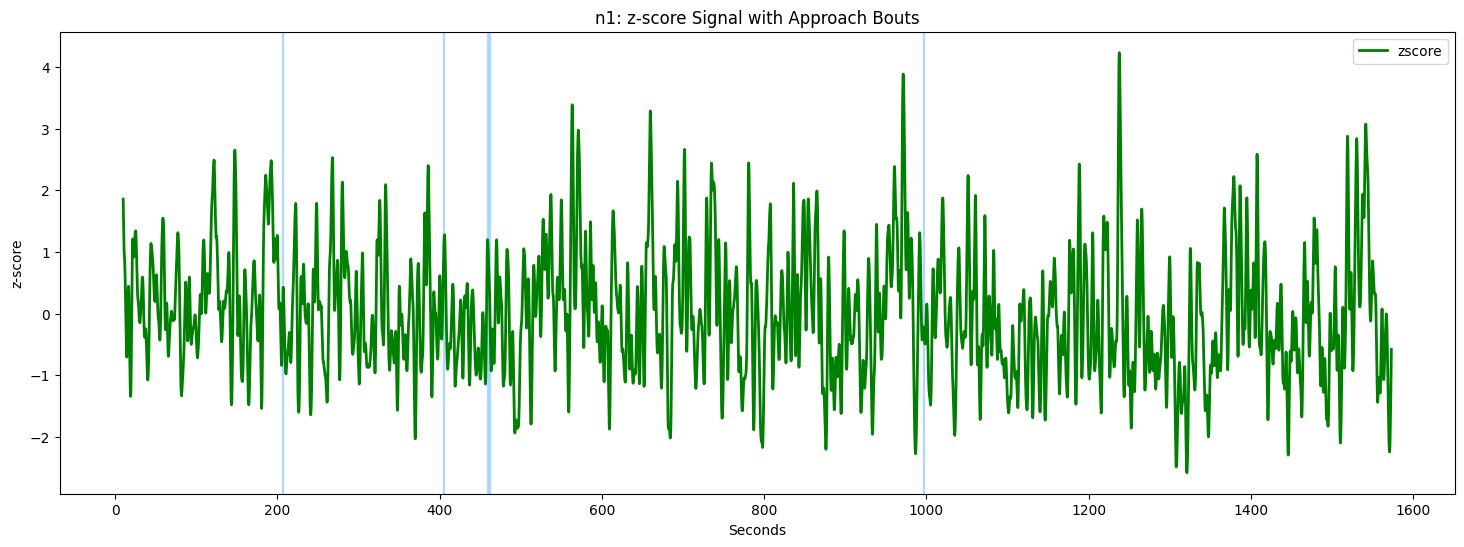

In [45]:
# tdt_data_obj.combine_consecutive_behaviors('', bout_time_threshold=2, min_occurrences=1)
tdt_data_obj.plot_behavior_event('Approach', plot_type='zscore')

In [46]:
# tdt_data_obj.remove_time(24, 33)

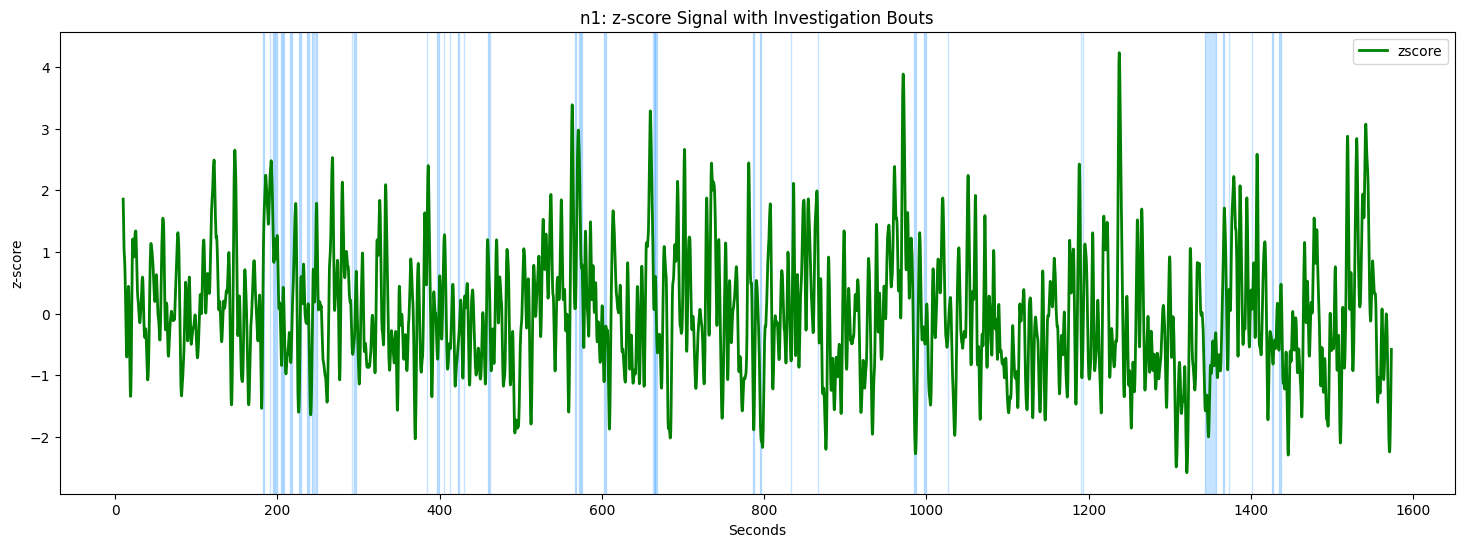

In [47]:
tdt_data_obj.plot_behavior_event('Investigation', plot_type='zscore')

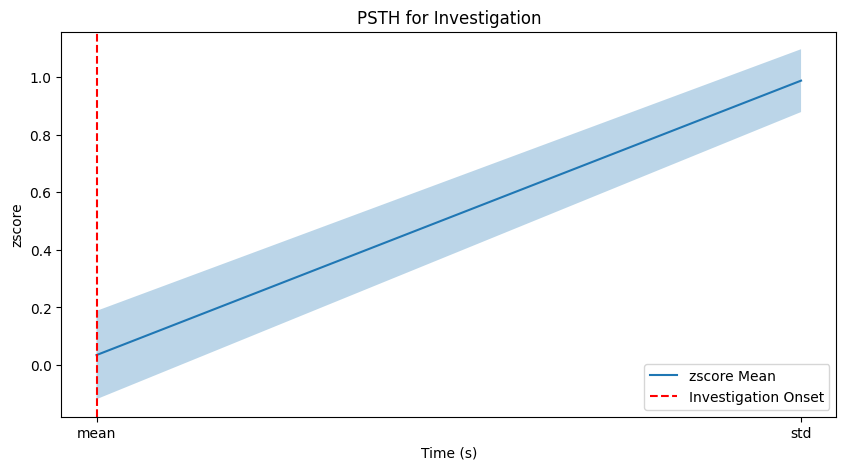

In [48]:
tdt_data_obj.plot_psth('Investigation', 'zscore')